<a href="https://colab.research.google.com/github/joshdsolis/DS-Sprint-02-Storytelling-With-Data/blob/master/module3-make-explanatory-visualizations/LS_DS_123_Make_explanatory_visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Choose appropriate visualizations


Recreate this [example by FiveThirtyEight:](https://fivethirtyeight.com/features/al-gores-new-movie-exposes-the-big-flaw-in-online-movie-ratings/)

![](https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png?w=575)

Using this data:

https://github.com/fivethirtyeight/data/tree/master/inconvenient-sequel

### Stretch goals

Recreate more examples from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

For example:
- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) ([`altair`](https://altair-viz.github.io/gallery/index.html#maps))
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) ([`statsmodels`](https://www.statsmodels.org/stable/index.html))

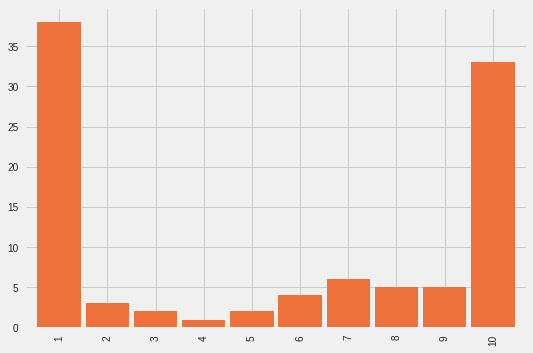

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


plt.style.use('fivethirtyeight')
fake = pd.Series([38,3,2,1,2,4,6,5,5,33], index=range(1,11))
fake.plot.bar(color='#EC713B', width = 0.9);


In [0]:
plt.style.use('fivethirtyeight')
#plt.style.available

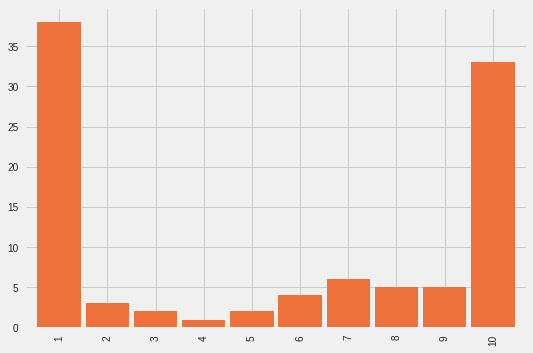

In [4]:
fake.plot.bar(color='#EC713B', width = 0.9);

Text(-2,46,'IMDb ratings for the film as of Aug. 29')

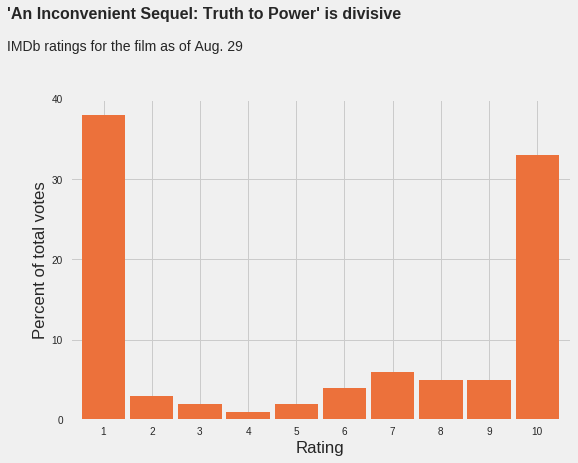

In [5]:

plt.style.use('fivethirtyeight')
fake = pd.Series([38,3,2,1,2,4,6,5,5,33], index=range(1,11))

ax = fake.plot.bar(color='#EC713B', width = 0.9);

ax.tick_params(labelrotation=0)
ax.set(xlabel='Rating', ylabel = 'Percent of total votes', yticks=range(0,50,10));

ax.text(x=-2,y=50,s="'An Inconvenient Sequel: Truth to Power' is divisive", fontsize=16, fontweight='bold');
ax.text(x=-2,y=46,s="IMDb ratings for the film as of Aug. 29")

#plt.title("'An Inconvenient Sequel: Truth to Power' is divisive")

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')

In [7]:
df.shape

(80053, 27)

In [8]:
df.head()

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,...,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
0,2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,...,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
1,2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,...,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2,2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,...,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
3,2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,...,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
4,2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,...,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [0]:
pd.options.display.max_columns = None

In [10]:
df.sample(1).T

,59962
timestamp,2017-08-22 15:00:05.215718
respondents,521
category,Aged 45+
link,http://www.imdb.com/title/tt6322922/ratings-age_4
average,4.4
mean,4.7
median,2
1_votes,237
2_votes,28
3_votes,13


In [0]:
df.timestamp = pd.to_datetime(df.timestamp)

In [12]:
df.timestamp.describe()

count                          80053
unique                         80053
top       2017-07-24 23:00:02.760781
freq                               1
first     2017-07-17 12:28:32.785639
last      2017-08-29 23:10:06.218251
Name: timestamp, dtype: object

In [0]:
df.set_index('timestamp', inplace=True)

In [0]:
df['2to9_votes'] = df['2_votes']+df['3_votes']+df['4_votes']+df['5_votes']+df['6_votes']+df['7_votes']+df['8_votes']+df['9_votes']

In [15]:
df[df.category=='IMDb users']

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct,2to9_votes
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-07-17 12:28:36.697246,678,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.4,5,304,14,8,5,9,10,18,24,30,256,44.8,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.8,118
2017-07-17 12:34:21.250099,678,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.4,5,304,14,8,5,9,10,18,24,30,256,44.8,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.8,118
2017-07-17 13:00:06.506688,678,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.4,5,304,14,8,5,9,10,18,24,30,256,44.8,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.8,118
2017-07-17 14:00:06.727742,679,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,305,14,8,5,9,10,18,24,30,256,44.9,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.7,118
2017-07-17 15:00:06.055125,679,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,305,14,8,5,9,10,18,24,30,256,44.9,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.7,118
2017-07-17 16:00:06.023053,679,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,305,14,8,5,9,10,18,24,30,256,44.9,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.7,118
2017-07-17 17:00:06.142993,679,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,305,14,8,5,9,10,18,24,30,256,44.9,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.7,118
2017-07-17 18:00:06.510891,680,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,306,14,8,5,9,10,18,24,30,256,45.0,2.1,1.2,0.7,1.3,1.5,2.6,3.5,4.4,37.6,118
2017-07-17 19:00:06.666467,680,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,306,14,8,5,9,10,18,24,30,256,45.0,2.1,1.2,0.7,1.3,1.5,2.6,3.5,4.4,37.6,118


In [0]:
lastday = df['2017']

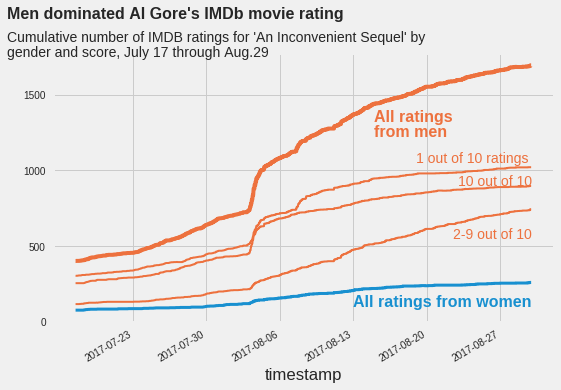

In [73]:
ax = lastday[lastday.category=='Males'].respondents.plot(color='#ED713E',linewidth=4)
ax = lastday[lastday.category=='Females'].respondents.plot(color='#1890D0',linewidth=3)
ax = lastday[lastday.category=='IMDb users']['1_votes'].plot(color='#ED713E',linewidth=2)
ax = lastday[lastday.category=='IMDb users']['10_votes'].plot(color='#ED713E',linewidth=2)
ax = lastday[lastday.category=='IMDb users']['2to9_votes'].plot(color='#ED713E',linewidth=2)
ax.set(yticks=range(0,2000,500), xticks = ['2017-7-23','2017-7-30','2017-8-6','2017-8-13','2017-8-20', '2017-8-27']);
ax.text(x='2017-7-11',y=2000,s="Men dominated Al Gore's IMDb movie rating", fontsize=16, fontweight='bold');
ax.text(x='2017-7-11',y=1850,s="Cumulative number of IMDB ratings for 'An Inconvenient Sequel' by");
ax.text(x='2017-7-11',y=1750,s="gender and score, July 17 through Aug.29");

ax.text(x='2017-8-15',y=1320, s="All ratings", color='#ED713E',fontsize=16, fontweight='bold');
ax.text(x='2017-8-15',y=1220, s="from men", color='#ED713E',fontsize=16,fontweight='bold');
ax.text(x='2017-8-19',y=1050, s="1 out of 10 ratings",color='#ED713E');
ax.text(x='2017-8-23',y=900, s="10 out of 10 ",color='#ED713E');
ax.text(x='2017-8-22-12',y=550, s="2-9 out of 10",color='#ED713E');
ax.text(x='2017-8-13',y=100, s="All ratings from women",fontsize=16, fontweight='bold',color='#1890D0');

In [0]:
df.tail(1)
df.reset_index(inplace = True)


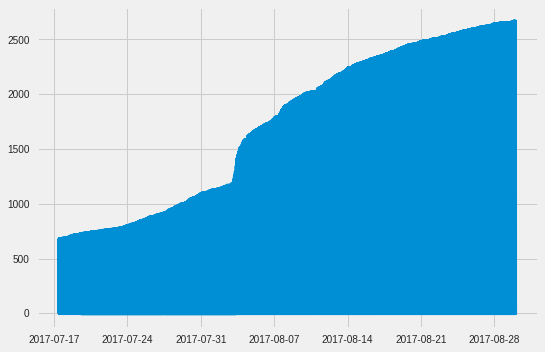

In [149]:
plt.plot(df['timestamp'], df['respondents'],linestyle='-');

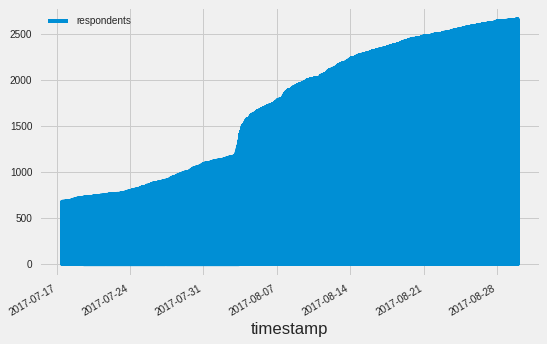

In [155]:
df.plot(x='timestamp', y='respondents', kind='line');

In [58]:
df.dtypes

timestamp      datetime64[ns]
respondents             int64
category               object
link                   object
average               float64
mean                  float64
median                  int64
1_votes                 int64
2_votes                 int64
3_votes                 int64
4_votes                 int64
5_votes                 int64
6_votes                 int64
7_votes                 int64
8_votes                 int64
9_votes                 int64
10_votes                int64
1_pct                 float64
2_pct                 float64
3_pct                 float64
4_pct                 float64
5_pct                 float64
6_pct                 float64
7_pct                 float64
8_pct                 float64
9_pct                 float64
10_pct                float64
dtype: object

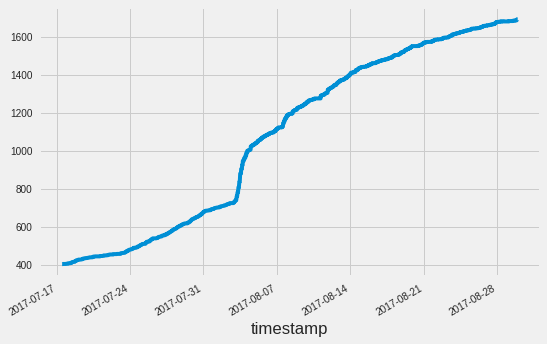

In [22]:
ax = lastday[lastday.category=='Males'].respondents.plot()
